# Convergence Comparison: GA, SA, and (μ+λ) ES

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Import the runner functions
from algorithms.ga_runner import run_ga
from algorithms.mulambda_runner import run_mulambda
from algorithms.sa_runner import run_sa

## Best Parameters from Table

- **GA**: Pop=150, Gen=800, CxProb=0.8, MutProb=0.3, Tourn. Size=3
- **(μ + λ) ES**: Pop=120 (μ), Gen=800, CxProb=0.5, MutProb=0.5, λ=50
- **SA**: Gen=5000, T₀=20, α=Geometric

In [2]:
# Set random seed for reproducibility
SEED = 1

## Run GA with Best Parameters

In [25]:
print("Running GA...")
ga_results = run_ga(
    pop_size=150,
    ngen=800,
    cxpb=0.8,
    mutpb=0.3,
    seed=1,
    show_plots=False,
    show_anim=False,
    debug_interval=100
)
print(f"GA Complete: Best Distance = {ga_results['best_clean']:.2f}, Time = {ga_results['time_sec']:.2f}s\n")

Running GA...
[INFO] Valores únicos del BMP original: [  0 255]
[INFO] Valores únicos tras invertir: [  0 255]
[INFO] Environment cargado: 92 x 113
[GEN  100] PenalizedBest=1232.0 | AvgPenalized=1262.2 | CleanBest=1172.4 | AvgClean=1176.4 | Std=4.6 | MinDist=6.08 | Conflicts=0
[GEN  200] PenalizedBest=1230.6 | AvgPenalized=1253.9 | CleanBest=1171.0 | AvgClean=1172.4 | Std=7.7 | MinDist=6.08 | Conflicts=0
[GEN  300] PenalizedBest=1223.9 | AvgPenalized=1306.9 | CleanBest=1167.4 | AvgClean=1170.1 | Std=8.1 | MinDist=6.00 | Conflicts=0
[GEN  400] PenalizedBest=1220.7 | AvgPenalized=1227.3 | CleanBest=1163.5 | AvgClean=1164.1 | Std=4.8 | MinDist=6.08 | Conflicts=0
[GEN  500] PenalizedBest=1219.9 | AvgPenalized=1281.1 | CleanBest=1162.7 | AvgClean=1164.7 | Std=9.1 | MinDist=6.08 | Conflicts=0
[GEN  600] PenalizedBest=1194.0 | AvgPenalized=1241.5 | CleanBest=1158.5 | AvgClean=1161.0 | Std=11.6 | MinDist=7.00 | Conflicts=0
[GEN  700] PenalizedBest=1188.2 | AvgPenalized=1241.5 | CleanBest=1155.

## Run (μ+λ) ES with Best Parameters

In [24]:
print("Running (μ+λ) ES...")
mulambda_results = run_mulambda(
    mu=120,
    lambda_=50,
    ngen=800,
    cxpb=0.5,
    mutpb=0.5,
    seed=0,
    show_plots=False,
    show_anim=False,
    debug_interval=100
)
print(f"(μ+λ) ES Complete: Best Distance = {mulambda_results['best_distance']:.2f}, Time = {mulambda_results['time_sec']:.2f}s\n")

Running (μ+λ) ES...
[INFO] Valores únicos del BMP original: [  0 255]
[INFO] Valores únicos tras invertir: [  0 255]
[INFO] Environment cargado: 92 x 113
[GEN  100] CleanBestDist=1080.91  CleanAvgDist=1080.91  Std=0.00  MinDist=5.00  Conflicts=2
[GEN  200] CleanBestDist=1080.91  CleanAvgDist=1080.91  Std=0.00  MinDist=5.00  Conflicts=2
[GEN  300] CleanBestDist=1080.91  CleanAvgDist=1080.91  Std=0.00  MinDist=5.00  Conflicts=2
[GEN  400] CleanBestDist=1088.32  CleanAvgDist=1088.32  Std=0.00  MinDist=6.08  Conflicts=0
[GEN  500] CleanBestDist=1088.32  CleanAvgDist=1088.32  Std=0.00  MinDist=6.08  Conflicts=0
[GEN  600] CleanBestDist=1088.32  CleanAvgDist=1088.32  Std=0.00  MinDist=6.08  Conflicts=0
[GEN  700] CleanBestDist=1082.91  CleanAvgDist=1086.88  Std=0.36  MinDist=6.08  Conflicts=0
[GEN  800] CleanBestDist=1082.91  CleanAvgDist=1082.91  Std=0.00  MinDist=6.08  Conflicts=0

===== μ+λ COMPLETADO =====
Mejor fitness penalizado = 1104.659
Mejor distancia real     = 1082.909
Tiempo = 1

## Run SA with Best Parameters

In [26]:
print("Running SA...")
# For SA, we need to calculate end_temp to get geometric cooling with the parameters in the table
# Using T_final such that alpha = (T_final/T_0)^(1/n_iter)
# We'll use a typical final temperature
sa_results = run_sa(
    n_iter=5000,
    start_temp=20.0,
    end_temp=0.1,  # This gives geometric cooling
    seed=2,
    show_plots=False,
    show_anim=False,
    debug_interval=500
)
print(f"SA Complete: Best Distance = {sa_results['best_distance']:.2f}, Time = {sa_results['time_sec']:.2f}s\n")

Running SA...
[INFO] Valores únicos del BMP original: [  0 255]
[INFO] Valores únicos tras invertir: [  0 255]
[INFO] Environment cargado: 92 x 113
[IT     1] T=19.9788  BestPenalized=3297.08  BestCleanDist=1032.08  CurrCleanDist=1032.08  MinDist=0.00  Conflicts=15
[IT   500] T=11.7741  BestPenalized=2900.38  BestCleanDist=1159.68  CurrCleanDist=1160.26  MinDist=0.00  Conflicts=9
[IT  1000] T=6.9314  BestPenalized=2878.70  BestCleanDist=1245.45  CurrCleanDist=1248.28  MinDist=0.00  Conflicts=8
[IT  1500] T=4.0806  BestPenalized=2831.68  BestCleanDist=1272.18  CurrCleanDist=1272.18  MinDist=1.41  Conflicts=7
[IT  2000] T=2.4022  BestPenalized=2706.48  BestCleanDist=1268.18  CurrCleanDist=1270.76  MinDist=1.41  Conflicts=7
[IT  2500] T=1.4142  BestPenalized=2529.32  BestCleanDist=1335.32  CurrCleanDist=1336.49  MinDist=5.00  Conflicts=2
[IT  3000] T=0.8326  BestPenalized=2493.92  BestCleanDist=1335.32  CurrCleanDist=1335.32  MinDist=5.00  Conflicts=2
[IT  3500] T=0.4901  BestPenalized=24

## NSGA-II

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.ga_runner_multi import run_ga_multi

# Configuración
POP_SIZE = 120
NGEN = 1000

print("Ejecutando NSGA-II para análisis de Hipervolumen...")
multi_results = run_ga_multi(
    pop_size=POP_SIZE,
    ngen=NGEN,
    cxpb=0.6,
    mutpb=0.2,
    seed=2,
    show_plots=False, # Lo mostramos abajo personalizado
    show_anim=False
)


Ejecutando NSGA-II para análisis de Hipervolumen...
[INFO] Valores únicos del BMP original: [  0 255]
[INFO] Valores únicos tras invertir: [  0 255]
[INFO] Environment cargado: 92 x 113

=== Running NSGA-II Multiobjective GA ===
[GEN   10] PenalBest=3000.8 | PenalAvg=3280.8 | CleanBest=1032.1 | CleanAvg=1033.8 | StdClean=6.6 | MinDist=0.00 | Conflicts=10
[GEN   20] PenalBest=2550.0 | PenalAvg=3273.8 | CleanBest=1032.1 | CleanAvg=1033.1 | StdClean=5.7 | MinDist=5.00 | Conflicts=6
[GEN   30] PenalBest=1693.7 | PenalAvg=3223.6 | CleanBest=1032.1 | CleanAvg=1034.6 | StdClean=9.4 | MinDist=5.00 | Conflicts=4
[GEN   40] PenalBest=1693.7 | PenalAvg=3246.7 | CleanBest=1032.1 | CleanAvg=1033.5 | StdClean=7.5 | MinDist=5.00 | Conflicts=4
[GEN   50] PenalBest=1693.7 | PenalAvg=3235.4 | CleanBest=1032.1 | CleanAvg=1033.5 | StdClean=7.4 | MinDist=5.00 | Conflicts=4
[GEN   60] PenalBest=1693.7 | PenalAvg=3235.4 | CleanBest=1032.1 | CleanAvg=1033.5 | StdClean=7.4 | MinDist=5.00 | Conflicts=4
[GEN   7

## Convergence Plot Comparison - Mono Variable 

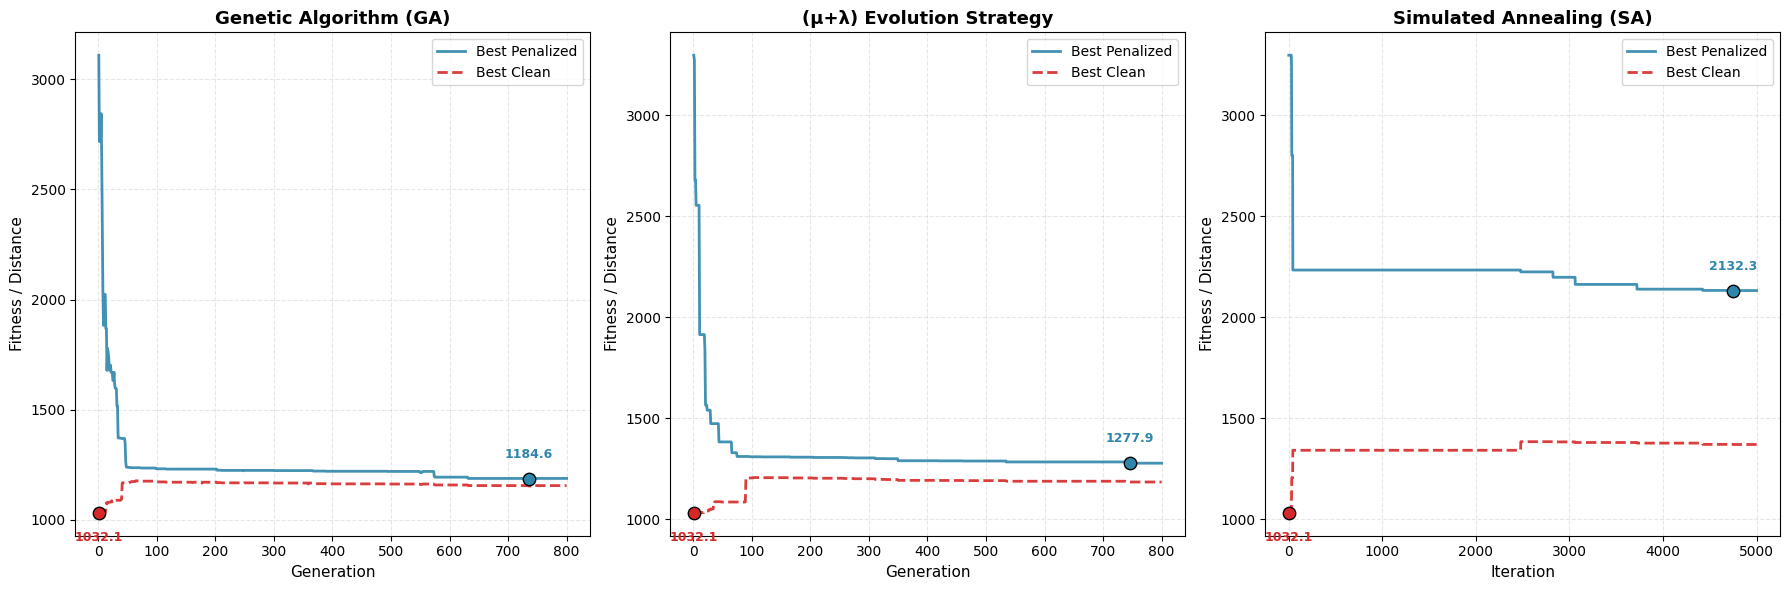

\nFigures saved as:
  - convergence_comparison_side_by_side.pdf
  - convergence_comparison_side_by_side.png


In [13]:
#Create figure with 3 subplots in 1 row (side by side)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

def plot_algo_convergence(ax, best_penalized_hist, best_clean_hist, x_label, title):
    # Ensure inputs are numpy arrays
    best_penalized_hist = np.array(best_penalized_hist)
    best_clean_hist = np.array(best_clean_hist)
    
    iters = np.arange(1, len(best_penalized_hist) + 1)
    
    # Plot Penalized Best
    ax.plot(iters, best_penalized_hist, label="Best Penalized", 
            linewidth=2, color='#2E86AB', alpha=0.9)
            
    # Plot Clean Best
    ax.plot(iters, best_clean_hist, label="Best Clean", 
            linewidth=2, color='#D62828', linestyle='--', alpha=0.9)
            
    # Find mins
    min_pen = np.min(best_penalized_hist)
    idx_pen = np.argmin(best_penalized_hist)
    
    min_clean = np.min(best_clean_hist)
    idx_clean = np.argmin(best_clean_hist)

    # Mark Best Penalized
    ax.scatter(iters[idx_pen], min_pen, color='#2E86AB', s=80, zorder=5, edgecolors='black')
    ax.annotate(f"{min_pen:.1f}", 
                xy=(iters[idx_pen], min_pen), 
                xytext=(0, 15), textcoords="offset points",
                ha='center', fontsize=9, fontweight='bold', color='#2E86AB')

    # Mark Best Clean
    ax.scatter(iters[idx_clean], min_clean, color='#D62828', s=80, zorder=5, edgecolors='black')
    ax.annotate(f"{min_clean:.1f}", 
                xy=(iters[idx_clean], min_clean), 
                xytext=(0, -20), textcoords="offset points",
                ha='center', fontsize=9, fontweight='bold', color='#D62828')
                
    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel('Fitness / Distance', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend()

# 1. GA Plot
plot_algo_convergence(
    ax1, 
    ga_results['penalized_best'], 
    ga_results['clean_best'], 
    "Generation", 
    "Genetic Algorithm (GA)"
)

# 2. (μ+λ) ES Plot
plot_algo_convergence(
    ax2, 
    mulambda_results['penalized_best'], 
    mulambda_results['clean_best'], 
    "Generation", 
    "(μ+λ) Evolution Strategy"
)

# 3. SA Plot
plot_algo_convergence(
    ax3, 
    sa_results['penalized_best'], 
    sa_results['clean_best'], 
    "Iteration", 
    "Simulated Annealing (SA)"
)

plt.tight_layout()

# Save figure for paper
plt.savefig('convergence_comparison_side_by_side.pdf', dpi=300, bbox_inches='tight')
plt.savefig('convergence_comparison_side_by_side.png', dpi=300, bbox_inches='tight')

plt.show()

print("\\nFigures saved as:")
print("  - convergence_comparison_side_by_side.pdf")
print("  - convergence_comparison_side_by_side.png")

## All Algorithms Convergence

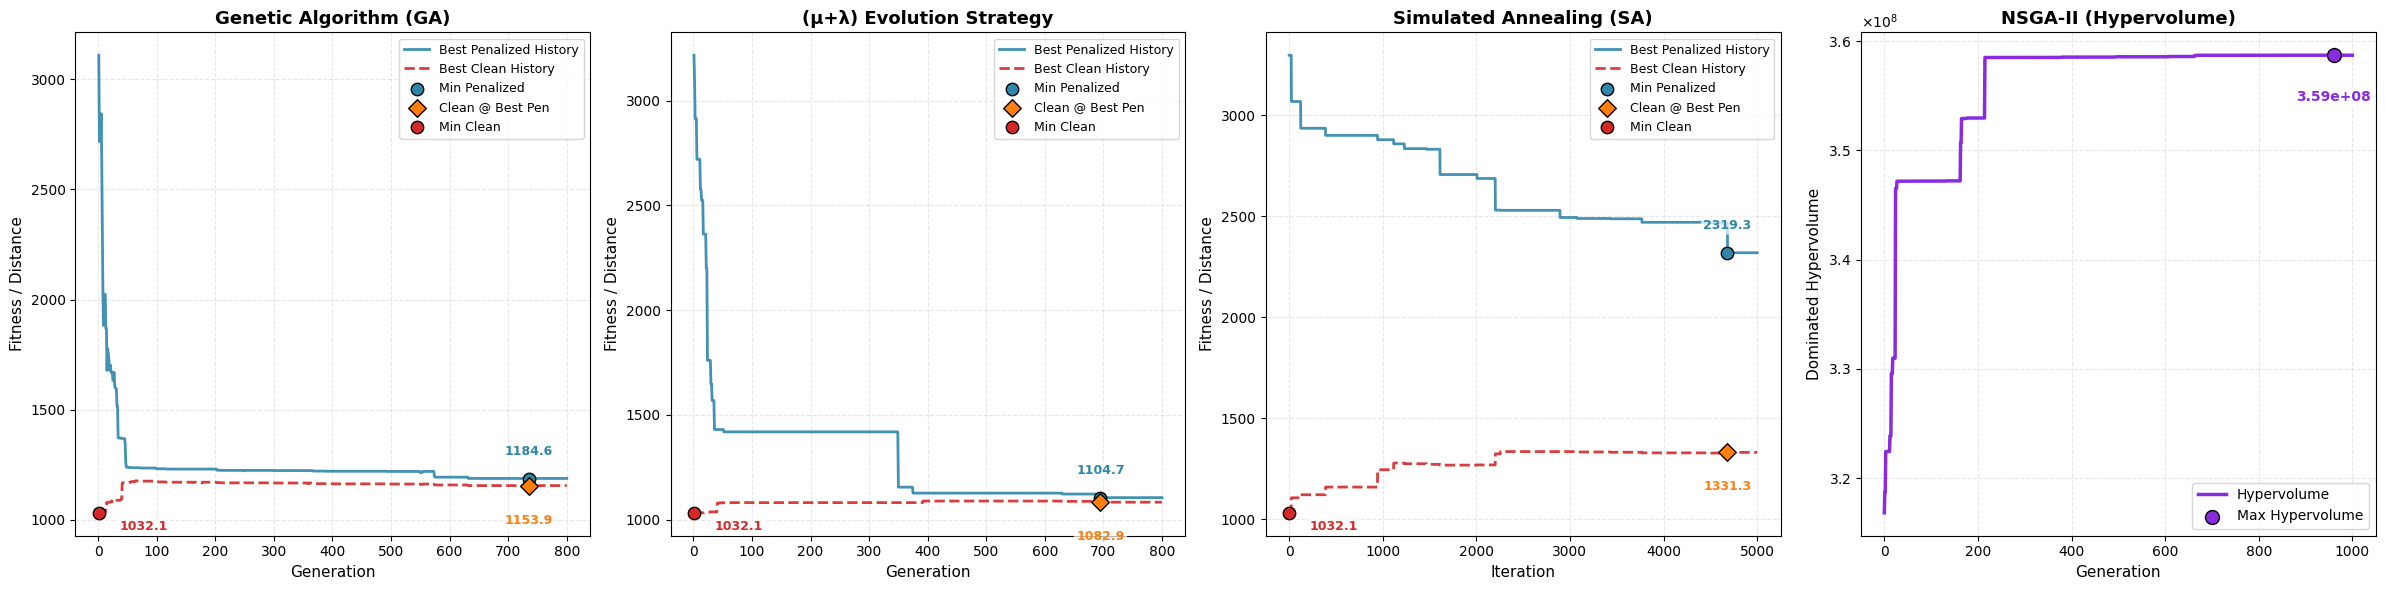


Figures saved as:
  - convergence_comparison_all_4.pdf
  - convergence_comparison_all_4.png


In [28]:
# Create figure with 4 subplots in 1 row
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

def plot_algo_convergence(ax, best_penalized_hist, best_clean_hist, x_label, title):
    # Convertir a numpy
    best_penalized_hist = np.array(best_penalized_hist)
    best_clean_hist = np.array(best_clean_hist)
    
    iters = np.arange(1, len(best_penalized_hist) + 1)
    
    # 1. Plot Líneas
    ax.plot(iters, best_penalized_hist, label="Best Penalized History", 
            linewidth=2, color='#2E86AB', alpha=0.9)
    ax.plot(iters, best_clean_hist, label="Best Clean History", 
            linewidth=2, color='#D62828', linestyle='--', alpha=0.9)
            
    # 2. Encontrar mínimos e índices
    min_pen = np.min(best_penalized_hist)
    idx_pen = np.argmin(best_penalized_hist)
    
    min_clean = np.min(best_clean_hist)
    idx_clean = np.argmin(best_clean_hist)

    # Valor Clean en el índice del Mejor Penalizado
    clean_at_best_pen_val = best_clean_hist[idx_pen]

    # Estilo común para las cajas de texto (fondo blanco para leer mejor)
    bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)

    # --- MARKER 1: Best Penalized (AZUL) -> Texto ARRIBA ---
    # Added label for legend
    ax.scatter(iters[idx_pen], min_pen, color='#2E86AB', s=80, zorder=5, edgecolors='black', label="Min Penalized")
    ax.annotate(f"{min_pen:.1f}", 
                xy=(iters[idx_pen], min_pen), 
                xytext=(0, 15), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold', color='#2E86AB',
                bbox=bbox_props)

    # --- MARKER 2: Clean @ Best Pen (NARANJA) -> Texto ABAJO ---
    # Label is already there
    ax.scatter(iters[idx_pen], clean_at_best_pen_val, color='#ff7f0e', s=80, marker='D', zorder=5, edgecolors='black', label="Clean @ Best Pen")
    ax.annotate(f"{clean_at_best_pen_val:.1f}", 
                xy=(iters[idx_pen], clean_at_best_pen_val), 
                xytext=(0, -20), textcoords="offset points",
                ha='center', va='top', fontsize=9, fontweight='bold', color='#ff7f0e',
                bbox=bbox_props)

    # --- MARKER 3: Global Best Clean (ROJO) -> Texto DIAGONAL DERECHA ABAJO ---
    # Added label for legend. Moved text to (15, -10) as requested.
    ax.scatter(iters[idx_clean], min_clean, color='#D62828', s=80, zorder=5, edgecolors='black', label="Min Clean")
    ax.annotate(f"{min_clean:.1f}", 
                xy=(iters[idx_clean], min_clean), 
                xytext=(15, -5), textcoords="offset points", 
                ha='left', va='top', fontsize=9, fontweight='bold', color='#D62828',
                bbox=bbox_props)
                
    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel('Fitness / Distance', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# 1. GA Plot
plot_algo_convergence(ax1, ga_results['penalized_best'], ga_results['clean_best'], "Generation", "Genetic Algorithm (GA)")

# 2. ES Plot
plot_algo_convergence(ax2, mulambda_results['penalized_best'], mulambda_results['clean_best'], "Generation", "(μ+λ) Evolution Strategy")

# 3. SA Plot
plot_algo_convergence(ax3, sa_results['penalized_best'], sa_results['clean_best'], "Iteration", "Simulated Annealing (SA)")

# 4. NSGA-II Hypervolume (Violeta)
hv_history = np.array(multi_results['hv_history'])
hv_gens = np.arange(0, len(hv_history))

ax4.plot(hv_gens, hv_history, label='Hypervolume', color='#8A2BE2', linewidth=2.5)

# Mark Max Hypervolume
max_hv = np.max(hv_history)
max_gen = np.argmax(hv_history)
bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)

ax4.scatter(max_gen, max_hv, color='#8A2BE2', s=100, zorder=5, edgecolors='black', label="Max Hypervolume")
ax4.annotate(f"{max_hv:.2e}",  # Notación científica forzada
             xy=(max_gen, max_hv), 
             xytext=(0, -25), textcoords="offset points",
             ha='center', va='top', fontsize=10, fontweight='bold', color='#8A2BE2',
             bbox=bbox_props)

ax4.set_title("NSGA-II (Hypervolume)", fontsize=13, fontweight='bold')
ax4.set_xlabel("Generation", fontsize=11)
ax4.set_ylabel("Dominated Hypervolume", fontsize=11)
# Eje Y en notación científica
ax4.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax4.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
ax4.grid(True, linestyle='--', alpha=0.3)
ax4.legend(loc='lower right')

plt.tight_layout()
plt.savefig('convergence_comparison_all_4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('convergence_comparison_all_4.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigures saved as:")
print("  - convergence_comparison_all_4.pdf")
print("  - convergence_comparison_all_4.png")
